In [ ]:
!pip install --upgrade tensorflow-gpu==2.0
!pip install plotly
!pip install --upgrade nbformat
!pip install nltk
!pip install spacy
!pip install WordCloud
!pip install gensim

     |████████████████████████████████| 380.8MB 46kB/s 
     |████████████████████████████████| 3.8MB 51.8MB/s 
     |████████████████████████████████| 450kB 54.8MB/s 
     |████████████████████████████████| 51kB 7.7MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=13a65833c5f90f7a70eb5cac6816c03ef4b0a9ca3b7001d352a894d8e33a4fe4
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 2.0.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 2.0.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing ins

In [ ]:
!pip install jupyterthemes

     |████████████████████████████████| 7.0MB 7.8MB/s 
     |████████████████████████████████| 9.5MB 38.6MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 51kB 8.2MB/s 
ERROR: google-colab 1.0.0 has requirement notebook~=5.3.0; python_version >= "3.0", but you'll have notebook 6.1.4 which is incompatible.
  Found existing installation: notebook 5.3.1
    Uninstalling notebook-5.3.1:
      Successfully uninstalled notebook-5.3.1


# **1. Loading modules and data**

In [ ]:
import nltk
nltk.download('punkt')
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Embedding, LSTM, Input, Conv1D, MaxPool1D, Bidirectional
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv


In [ ]:
uploaded1 = files.upload()

Saving True.csv to True.csv


In [ ]:
fake_news = pd.read_csv('Fake.csv')
true_news = pd.read_csv('True.csv')

In [ ]:
fake_news.head()

title  ...               date
0   Donald Trump Sends Out Embarrassing New Year’...  ...  December 31, 2017
1   Drunk Bragging Trump Staffer Started Russian ...  ...  December 31, 2017
2   Sheriff David Clarke Becomes An Internet Joke...  ...  December 30, 2017
3   Trump Is So Obsessed He Even Has Obama’s Name...  ...  December 29, 2017
4   Pope Francis Just Called Out Donald Trump Dur...  ...  December 25, 2017

[5 rows x 4 columns]

In [ ]:
true_news.head()

title  ...                date
0  As U.S. budget fight looms, Republicans flip t...  ...  December 31, 2017 
1  U.S. military to accept transgender recruits o...  ...  December 29, 2017 
2  Senior U.S. Republican senator: 'Let Mr. Muell...  ...  December 31, 2017 
3  FBI Russia probe helped by Australian diplomat...  ...  December 30, 2017 
4  Trump wants Postal Service to charge 'much mor...  ...  December 29, 2017 

[5 rows x 4 columns]

In [ ]:
fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
true_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [ ]:
fake_news.isnull().sum() #to check nan values in the fake_news dataset

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
true_news.isnull().sum() #to check nan values in the true_news dataset

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
print('Total number of fake news in fake_news dataset:', len(fake_news), '\n')
print('Total number of true/real news in true_news dataset:', len(true_news), '\n')

Total number of fake news in fake_news dataset: 23481 

Total number of true/real news in true_news dataset: 21417 



In [ ]:
print('Fake news in the fake_news dataset in position 0:\n')
fake_news['text'][0]

Fake news in the fake_news dataset in position 0:



'Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year,  President Angry Pants tweeted.  2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America!  Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t ev

In [ ]:
print('True/Real news in the true_news dataset in position 0:\n')
true_news['text'][0]

True/Real news in the true_news dataset in position 0:



'WASHINGTON (Reuters) - The head of a conservative Republican faction in the U.S. Congress, who voted this month for a huge expansion of the national debt to pay for tax cuts, called himself a “fiscal conservative” on Sunday and urged budget restraint in 2018. In keeping with a sharp pivot under way among Republicans, U.S. Representative Mark Meadows, speaking on CBS’ “Face the Nation,” drew a hard line on federal spending, which lawmakers are bracing to do battle over in January. When they return from the holidays on Wednesday, lawmakers will begin trying to pass a federal budget in a fight likely to be linked to other issues, such as immigration policy, even as the November congressional election campaigns approach in which Republicans will seek to keep control of Congress. President Donald Trump and his Republicans want a big budget increase in military spending, while Democrats also want proportional increases for non-defense “discretionary” spending on programs that support educat

# **2. Feature Engineering**

In [ ]:
fake_news['is_fake'] = 0 #Add a new column 'is_fake' in fake_news dataset and indicate by 0 to classify each news in the fake_news dataset as 'fake news'

In [ ]:
true_news['is_fake'] = 1 #Add a new column 'is_fake' in true_news dataset and indicate by 1 to classify each news in the true_news dataset as 'true/real news'

In [ ]:
fake_news.sample(1)

title  ... is_fake
19438  CLASSLESS MICHELLE OBAMA Hits Trump With Outri...  ...       0

[1 rows x 5 columns]

In [ ]:
true_news.sample(1)

title  ... is_fake
1213  Trump says he believes Cuba responsible for at...  ...       1

[1 rows x 5 columns]

In [ ]:
#concatenate true_news and fake_news dataset into one dataframe
news = pd.concat([fake_news, true_news]).reset_index(drop = True)
print('Length of news dataset after concat:', news.shape, '\n')
print('New dataset after combining true and fake news dataset:')
news.sample(5)

Length of news dataset after concat: (44898, 5) 

New dataset after combining true and fake news dataset:


title  ... is_fake
21946         History Lesson: America’s Renegade Warfare  ...       0
6525    Homophobes Lose Their Damn Minds After Reques...  ...       0
21115  NEW YORK CITY VALUES? “Masturbation Stations” ...  ...       0
17402  BREAKING: SCHIZOPHRENIC COMMANDER IN CHIEF Sen...  ...       0
5716    Hillary Gives HUGE Middle Finger To GOP Bigot...  ...       0

[5 rows x 5 columns]

In [ ]:
news.drop(columns = ['date'], inplace = True) #drop column 'date' from news dataset

In [ ]:
print('Length of news dataset after removing date column:', news.shape, '\n')
print('New dataset after removing date column:')
news.sample(5)

Length of news dataset after removing date column: (44898, 4) 

New dataset after removing date column:


title  ... is_fake
13935  BERNIE’S WORLD: SOCIALISM Forces Venezuelans t...  ...       0
16254  TERRIFIC! PRESIDENT TRUMP Takes On The United ...  ...       0
2531    Trump Was Whining About White House Leaks. Ch...  ...       0
4995    FBI Warns Republicans: Do Not Leak Clinton Em...  ...       0
28627  Trump says wants defense buildup to project U....  ...       1

[5 rows x 4 columns]

In [ ]:
#Add new column 'original' to news dataset by combining 'title' and 'text' columns with space in between
news['original'] = news['title'] + ' ' + news['text'] 
print('Length of news dataset after adding new column:', news.shape, '\n')
print('New dataset after adding new column:')
news.sample(5)

Length of news dataset after adding new column: (44898, 5) 

New dataset after adding new column:


title  ...                                           original
27763  Russia says to veto Western-backed draft U.N. ...  ...  Russia says to veto Western-backed draft U.N. ...
6348    Remember That Time Hypocrite Trump Tweeted Ob...  ...   Remember That Time Hypocrite Trump Tweeted Ob...
24922  Kremlin: we hope new U.S. envoy can help repai...  ...  Kremlin: we hope new U.S. envoy can help repai...
30229  Trump taps Goldman Sachs executive Cohn for ke...  ...  Trump taps Goldman Sachs executive Cohn for ke...
26842  Alaska governor urges budget compromise to avo...  ...  Alaska governor urges budget compromise to avo...

[5 rows x 5 columns]

# **3. Data Cleaning**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
print('Words in the stop_words are:')
stop_words

Words in the stop_words are:


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
def remove_noise(text):
    text = re.sub('\[.*?\]','', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text
  
news['original'] = news['original'].apply(lambda x: remove_noise(x))

In [ ]:
#remove stopwords and words with 2 or less characters
def preprocess(text):
  result = []
  for token in gensim.utils.simple_preprocess(text):
    if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3 and token not in stop_words:
      result.append(token)
  return result

In [ ]:
#remove stop words in 'original' column and store the updated one in new column 'clean'
news['clean'] = news['original'].apply(preprocess)

In [ ]:
print('Original news in the dataset without removing stop words in position 0:\n')
print(news['original'][0], '\n')

print('Same news after removing stop words:\n')
print(news['clean'][0])

Original news in the dataset without removing stop words in position 0:

 Donald Trump Sends Out Embarrassing New Year’s Eve Message This is Disturbing Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that Instead he had to give a shout out to his enemies haters and  the very dishonest fake news media  The former reality show star had just one job to do and he couldn t do it As our Country rapidly grows stronger and smarter I want to wish all of my friends supporters enemies haters and even the very dishonest Fake News Media a Happy and Healthy New Year  President Angry Pants tweeted   will be a great year for America As our Country rapidly grows stronger and smarter I want to wish all of my friends supporters enemies haters and even the very dishonest Fake News Media a Happy and Healthy New Year  will be a great year for America  Donald J Trump realDonaldTrump December   s tweet went down about as welll as you d expectWhat kind of president sends a New Ye

In [ ]:
print('Now the length of the dataset is:', news.shape)

Now the length of the dataset is: (44898, 7)


In [ ]:
#Add words in the dataset to dictionary
vocab = []
for i in news.clean:
  for j in i:
    vocab.append(j)

print('Total number of words in the vocabulary:', len(vocab), '\n')
#print('Some of the words in the vocabulary are:', vocab)


Total number of words in the vocabulary: 9090079 



In [ ]:
unique_words = list(set(vocab))
print('Number of unique words in the vocabulary:', len(unique_words))
print('Some of the words in the vocabulary are:', unique_words)

Number of unique words in the vocabulary: 181971
Some of the words in the vocabulary are: ['undecidedthe', 'nasrallah', 'romanceoedipal', 'roils', 'vanderboegh', 'municpality', 'proassad', 'wordingthese', 'druzhinin', 'abuses', 'taboo', 'postyesterday', 'solwezi', 'passingat', 'needstsa', 'processputting', 'underwaybut', 'burnit', 'curtainthough', 'federallyfunded', 'funke', 'enexd', 'emit', 'recapitalizing', 'peripheral', 'kushnerbut', 'sprinter', 'sarahmlauren', 'transparent', 'mindshere', 'learnedalfa', 'gunsduring', 'intimidatedto', 'strangeloveis', 'survived', 'sitethe', 'aggravatingand', 'tragedylewinsky', 'topicjudge', 'populism', 'liesfor', 'contraception', 'plain', 'predecessorhaas', 'abdifatah', 'thaung', 'seizures', 'uncommitted', 'exgov', 'planhedge', 'despacito', 'reallywho', 'centralize', 'flunkies', 'cyclesthe', 'firedwe', 'fredicook', 'italynow', 'chetnik', 'profloumoore', 'incidentconway', 'diebut', 'jonesschneider', 'signoff', 'alwaleeds', 'thebestcloser', 'undoes', '

In [ ]:
#join the cleaned words into string
news['clean_join'] = news['clean'].apply(lambda x: " ".join(x))

In [ ]:
print('Original news in position 1:\n')
print(news['original'][1], '\n')
print('Length of the original news:', len(news['original'][1]))
print('-'*150)

print('Same news after cleaning and joining in position 1:\n')
print(news['clean_join'][1], '\n')
print('Length of the cleaned news:', len(news['clean_join'][1]))

Original news in position 1:

 Drunk Bragging Trump Staffer Started Russian Collusion Investigation House Intelligence Committee Chairman Devin Nunes is going to have a bad day He s been under the assumption like many of us that the Christopher Steeledossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump As it happens the dossier is not what started the investigation according to documents obtained by the New York TimesFormer Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary ClintonOn top of that Papadopoulos wasn t just a covfefe boy for Trump as his administration has alleged He had a much larger role but none so damning as being a drunken fool in a wine bar Coffee boys  don t help to arrange a New York meeting between Trump and President Abdel Fattah elSisi of Egypt two months before the election It was known be

# **5. Visualize**

In [ ]:
print('There are {} unique subject news in the dataset'.format(news['subject'].nunique()), '\n')
print('Eight subject news and number of entries in the dataset are:\n', news['subject'].value_counts(sort = True))


There are 8 unique subject news in the dataset 

Eight subject news and number of entries in the dataset are:
 politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64


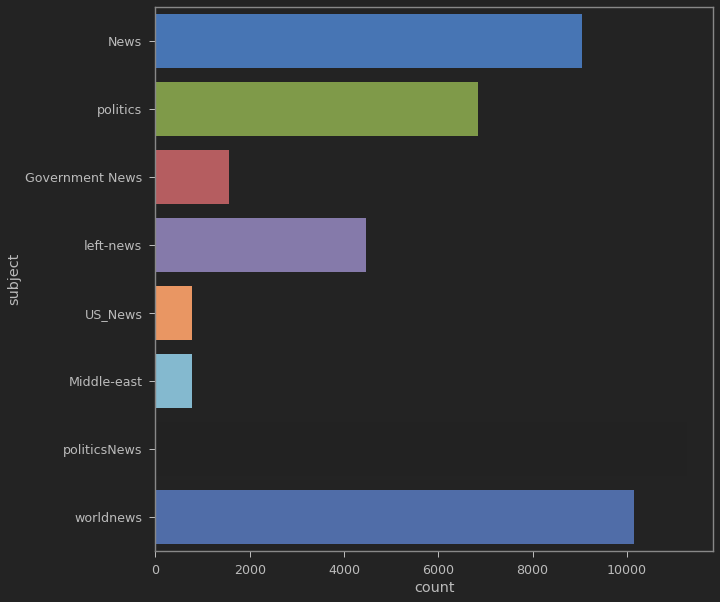

In [ ]:
plt.figure(figsize = (10,10))
sn.countplot(y = 'subject', data = news)

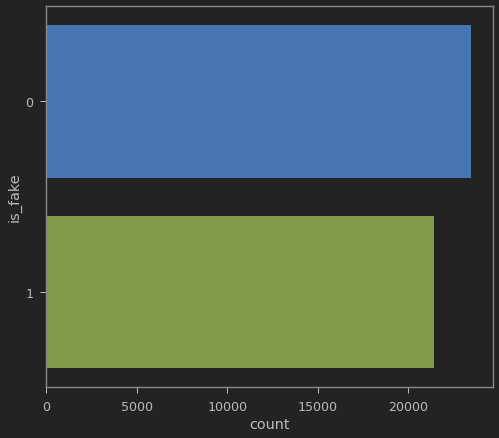

In [ ]:
sn.countplot(y = 'is_fake', data = news) # 0 means fake and 1 means true/real news

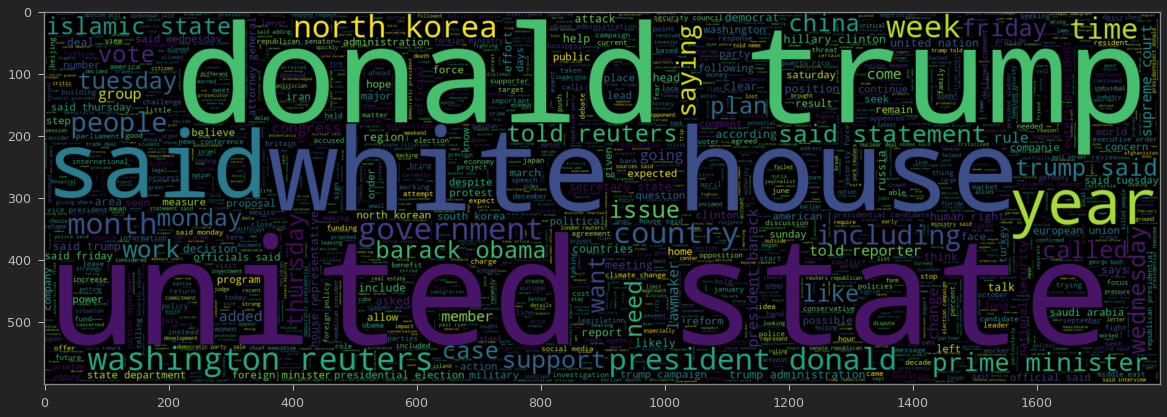

In [ ]:
#plot the most frequesnt words in true/real category
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000, width = 1800, height = 800, stopwords = stop_words).generate(" ".join(news[news.is_fake == 1].clean_join))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

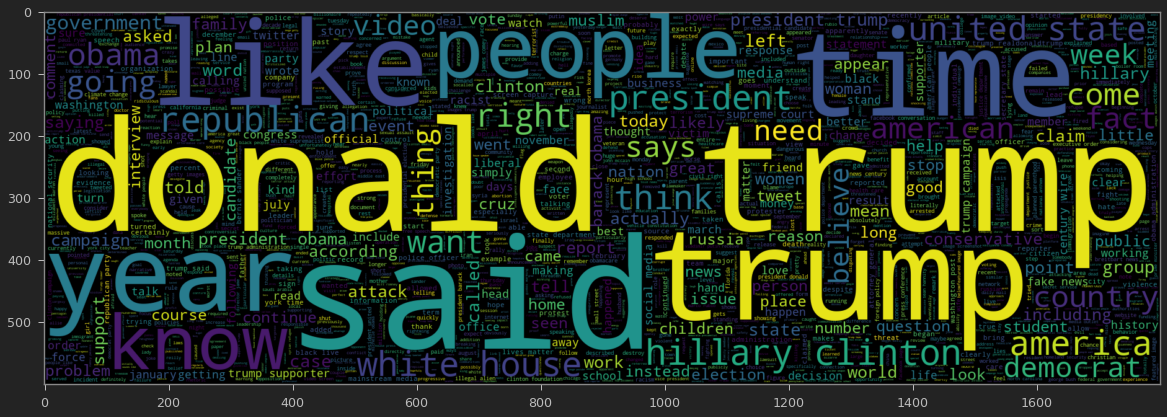

In [ ]:
#plot the most frequesnt words in fake category
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000, width = 1800, height = 600, stopwords = stop_words).generate(" ".join(news[news.is_fake == 0].clean_join))
plt.imshow(wc, interpolation = 'bilinear')
plt.show()

In [ ]:
maxlen = -1
for doc in news.clean_join:
  tokens = nltk.word_tokenize(doc)
  if(maxlen<len(tokens)):
    maxlen = len(tokens)

print('Maximum number of words a news has in dataset is:', maxlen)

Maximum number of words a news has in dataset is: 4222


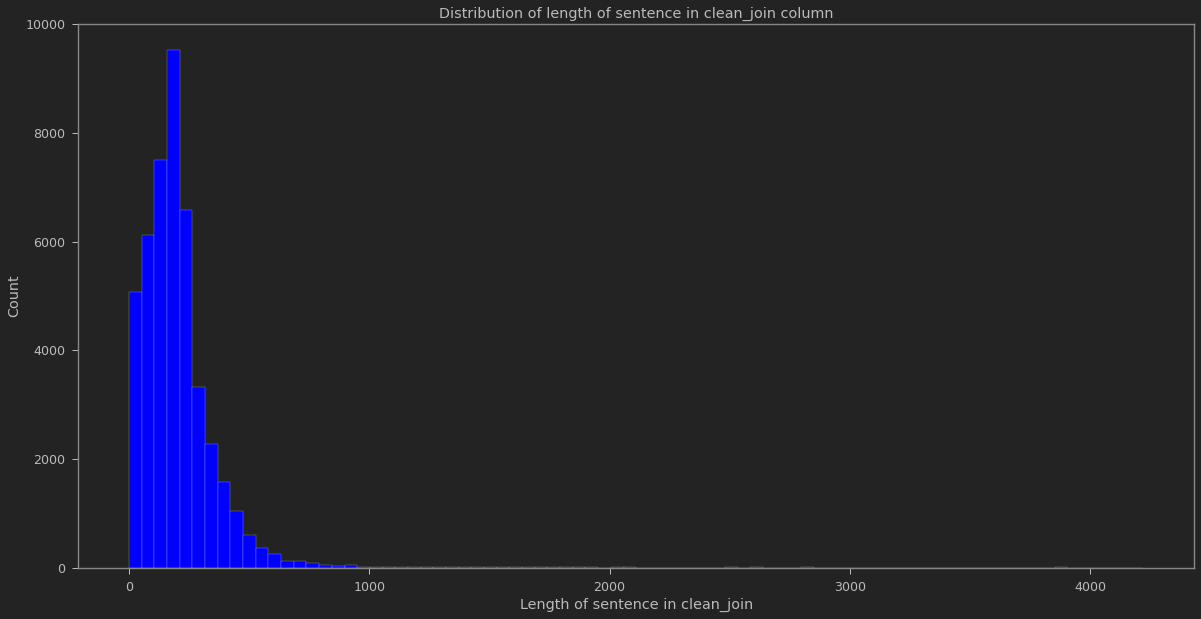

In [ ]:
#Distribution of length of words in dataset
plt.figure(figsize = (20, 10))
plt.hist(x = [len(nltk.word_tokenize(x)) for x in news.clean_join], bins = 80, color = 'blue', edgecolor = 'white')
plt.title('Distribution of length of sentence in clean_join column')
plt.xlabel('Length of sentence in clean_join')
plt.ylabel('Count')
plt.show()

<Figure size 1296x1296 with 0 Axes>

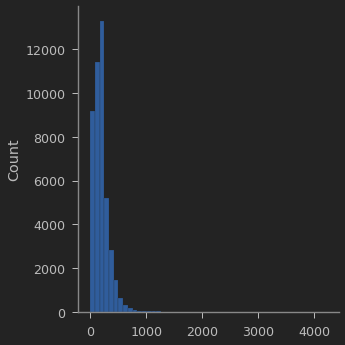

In [ ]:
plt.figure(figsize = (18, 18))
sn.displot(x = [len(nltk.word_tokenize(x)) for x in news.clean_join], kde = False, bins = 50)

# **6. Splitting,Tokenization and padding**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(news.clean_join, news.is_fake, test_size = 0.2)

In [ ]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
X_train[0]

X_train shape: (35918,)
X_test shape: (8980,)
y_train shape: (35918,)
y_test shape: (8980,)


'donald trump sends embarrassing year message disturbing donald trump wish americans happy year leave instead shout enemies haters dishonest fake news media reality star country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year great year america donald trump realdonaldtrump december tweet went welll expectwhat kind president sends year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval december uses word haters years wish marlene december

In [ ]:
#create a sequence of tokenized (encoded) words 
tokenizer = Tokenizer(num_words = 200000, oov_token = '<oov>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

In [ ]:
print('Original news:', news['clean_join'][0], '\n')
print('Encoded news:', train_sequences[0])

Original news: donald trump sends embarrassing year message disturbing donald trump wish americans happy year leave instead shout enemies haters dishonest fake news media reality star country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year president angry pants tweeted great year america country rapidly grows stronger smarter want wish friends supporters enemies haters dishonest fake news media happy healthy year great year america donald trump realdonaldtrump december tweet went welll expectwhat kind president sends year greeting like despicable petty infantile gibberish trump lack decency allow rise gutter long wish american citizens happy year bishop talbert swan talbertswan december likes calvin calvinstowell december impeachment great year america accept regaining control congress miranda yaver mirandayaver december hear talk include people hate wonder hate alan sandoval december uses word haters years wish ma

In [ ]:
print('Length of train_sequences:', len(train_sequences), '\n')
print('Length of test_sequences:', len(test_sequences))

Length of train_sequences: 35918 

Length of test_sequences: 8980


In [ ]:
train_padded = pad_sequences(train_sequences, maxlen = maxlen , padding = 'post', truncating = 'post')
test_padded = pad_sequences(test_sequences, maxlen = maxlen, truncating = 'post', )

print('Length of train_padded:', len(train_padded))
print('Length of test padded:', len(test_padded))

Length of train_padded: 35918
Length of test padded: 8980


# **7. Train LSTM Model**

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=200000, output_dim=300))
model.add(Bidirectional(LSTM(200)))
model.add(Dense(200, activation='relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 300)         60000000  
_________________________________________________________________
bidirectional_2 (Bidirection (None, 400)               801600    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               80200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 60,882,001
Trainable params: 60,882,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
y_train = np.array(y_train)

In [ ]:
history = model.fit(train_padded, y_train, batch_size=64, validation_split=0.1, epochs=5)

Train on 32326 samples, validate on 3592 samples
Epoch 1/5
32326/32326 [==============================] - 722s 22ms/sample - loss: 0.0339 - acc: 0.9870 - val_loss: 0.0048 - val_acc: 0.9992
Epoch 2/5
32326/32326 [==============================] - 723s 22ms/sample - loss: 0.0013 - acc: 0.9998 - val_loss: 0.0041 - val_acc: 0.9992
Epoch 3/5
32326/32326 [==============================] - 724s 22ms/sample - loss: 0.0011 - acc: 0.9997 - val_loss: 0.0123 - val_acc: 0.9983
Epoch 4/5
32326/32326 [==============================] - 733s 23ms/sample - loss: 4.9270e-04 - acc: 0.9998 - val_loss: 0.0060 - val_acc: 0.9989
Epoch 5/5
32326/32326 [==============================] - 724s 22ms/sample - loss: 2.3329e-04 - acc: 0.9999 - val_loss: 0.0098 - val_acc: 0.9989


# **Plot learning curves**

In [ ]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_' +string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' +string])
    plt.show()

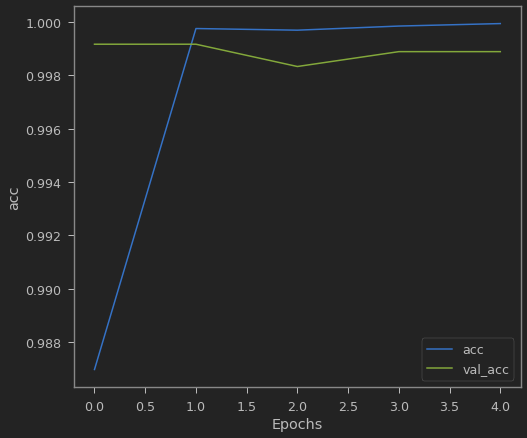

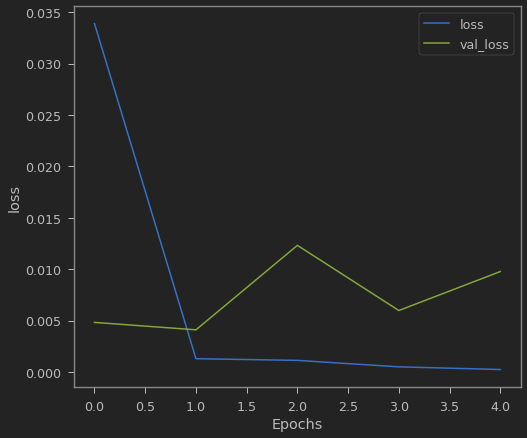

In [ ]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

# **8. Trained Model Performance**

In [ ]:
pred = model.predict(test_padded)

#if the predicted value is > 0.5 then news is real/true or it is fake
prediction = []
for i in range(len(pred)):
  if pred[i].item() > 0.5:
    prediction.append(1)
  else:
    prediction.append(0)

In [ ]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(prediction, list(y_test))
print('Model accuracy:', np.round(accuracy, 2))

Model accuracy: 0.53
